<a href="https://colab.research.google.com/github/relebohilebiza/MVCTutorial/blob/master/My_Real_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#==========Import libraries ======================================

from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np

import cv2

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)




In [0]:
============================================================old that i need to keep ======================================================

In [0]:
#============The directory for your dataset ================================

base_dir = os.path.join(os.path.dirname('/content/Tradition/'))
train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'validation/')

train_sesotho_dir = os.path.join(train_dir, 'sesotho')  # directory with our training cat pictures
train_zulu_dir = os.path.join(train_dir, 'zulu')  # directory with our training dog pictures
validation_sesotho_dir = os.path.join(validation_dir, 'sesotho')  # directory with our validation cat pictures
validation_zulu_dir = os.path.join(validation_dir, 'zulu')  # directory with our validation dog pictures

In [479]:
#===To see your directory ==============
zip_dir_base = os.path.dirname('Tradition/validation/')
!find $zip_dir_base -type d -print

Tradition/validation
Tradition/validation/sesotho
Tradition/validation/zulu


In [234]:
#==================NB!====================================
# very important to remove hidden foulders
import os 

!ls Tradition/train/

!rm -r Tradition/validation/.ipynb_checkpoints
#==================NB!====================================

train  validation


In [0]:
#=======make calculations to see how many photos in your dataset ===========
num_sesotho_tr = len(os.listdir(train_sesotho_dir))
num_zulu_tr = len(os.listdir(train_zulu_dir))

num_sesotho_val = len(os.listdir(validation_sesotho_dir))
num_zulu_val = len(os.listdir(validation_zulu_dir))

total_train = num_sesotho_tr + num_sesotho_tr
total_val = num_zulu_val + num_zulu_val

In [481]:
print('total training images for Sesotho:', num_sesotho_tr)
print('total training images for Zulu:', num_zulu_tr)

print('total validation images for Sesotho:', num_sesotho_val)
print('total validation images for Zulu:', num_zulu_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training images for Sesotho: 241
total training images for Zulu: 228
total validation images for Sesotho: 53
total validation images for Zulu: 56
--
Total training images: 482
Total validation images: 112


In [0]:
BATCH_SIZE = 50  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [0]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [484]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='categorical')

Found 469 images belonging to 2 classes.


In [485]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='categorical')

Found 109 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen) 

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

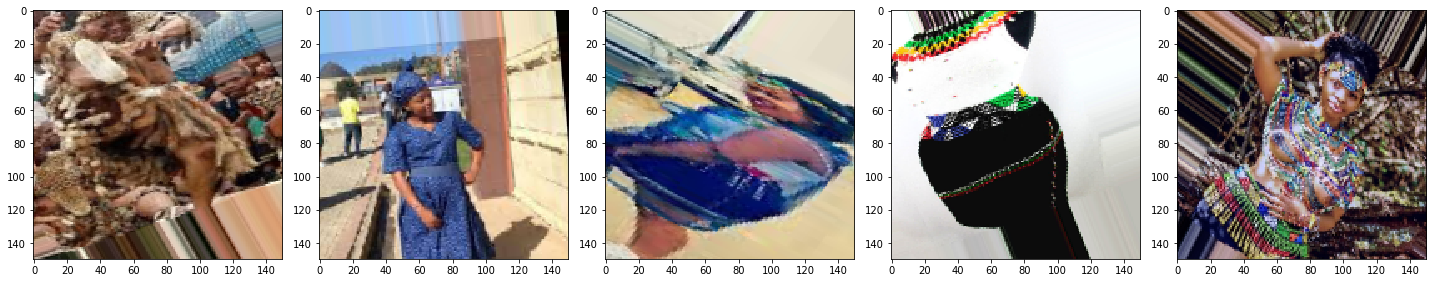

In [488]:
plotImages(sample_training_images[:5])  # Plot images 0-4

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [491]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 15, 15, 128)     

In [492]:
EPOCHS = 60 #a full iteration over sample 
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/60
10/10 [==============================] - 54s 5s/step - loss: 0.7155 - accuracy: 0.5437 - val_loss: 0.6480 - val_accuracy: 0.7248
Epoch 2/60
10/10 [==============================] - 48s 5s/step - loss: 0.6556 - accuracy: 0.6482 - val_loss: 0.6026 - val_accuracy: 0.7615
Epoch 3/60
10/10 [==============================] - 46s 5s/step - loss: 0.6304 - accuracy: 0.6695 - val_loss: 0.5645 - val_accuracy: 0.6514
Epoch 4/60
10/10 [==============================] - 50s 5s/step - loss: 0.5951 - accuracy: 0.7100 - val_loss: 0.5112 - val_accuracy: 0.7156
Epoch 5/60
10/10 [==============================] - 48s 5s/step - loss: 0.5475 - accuracy: 0.7313 - val_loss: 0.5863 - val_accuracy: 0.7523
Epoch 6/60
10/10 [==============================] - 48s 5s/step - loss: 0.5461 - accuracy: 0.7228 - val_loss: 0.5945 - val_accuracy: 0.7431
Epoch 7/60
10/10 [==============================] - 49s 5s/step - loss: 0.5222 - accuracy: 0.7335 - val_loss: 0.5071 - val_accuracy: 0.7339
Epoch 8/60
10/10 [==

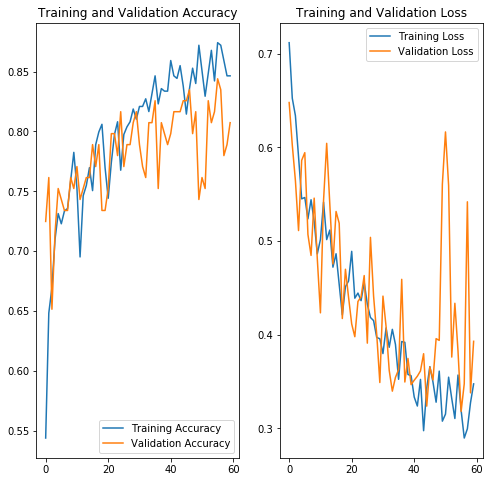

In [493]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

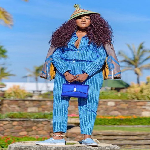

In [673]:
#===========Testing your model after training ===============

predictions = model.predict(val_data_gen)
predictions[0]
import numpy as np
import PIL.Image as Image

IMAGE_SHAPE = (150, 150)

getTest_image = Image.open('/content/change/why14.jpg').resize(IMAGE_SHAPE)
getTest_image

In [674]:
getTest_image = np.array(getTest_image)/150.0
getTest_image.shape

(150, 150, 3)

In [675]:
result = model.predict(getTest_image[np.newaxis, ...])
result.shape



(1, 2)

In [676]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


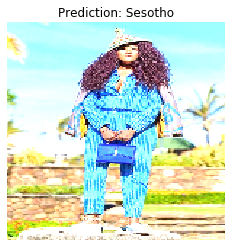

In [677]:

imagenet_labels = ['sesotho', 'zulu']

plt.imshow(getTest_image)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [0]:
==============================================================================================================================